In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm


dates = pd.date_range(start='2024-01-01', periods=34)
locations = ['Manila', 'Cebu', 'Davao']

data = []
for date in dates:
    for location in locations:
        if location == 'Manila':
            price = 40
            units = 280 + date.day % 20
        elif location == 'Cebu':
            price = 38
            units = 260 + date.day % 25
        else:  # Davao
            price = 35
            units = 240 + date.day % 30

        total = units * price
        data.append([date, location, units, price, total])

df_100 = pd.DataFrame(data, columns=['date', 'location', 'units_sold', 'price_per_unit', 'total_sales'])

file_path_100 = 'jollibee_peach_mango_pie_sales_100.xlsx'
df_100.to_excel(file_path_100, index=False)

print(f"Excel file saved as: {file_path_100}")


Excel file saved as: jollibee_peach_mango_pie_sales_100.xlsx


In [2]:
import pandas as pd

df = pd.read_excel('jollibee_peach_mango_pie_sales_100.xlsx')
pd.set_option('display.max_rows', None)

print(df)

          date location  units_sold  price_per_unit  total_sales
0   2024-01-01   Manila         281              40        11240
1   2024-01-01     Cebu         261              38         9918
2   2024-01-01    Davao         241              35         8435
3   2024-01-02   Manila         282              40        11280
4   2024-01-02     Cebu         262              38         9956
5   2024-01-02    Davao         242              35         8470
6   2024-01-03   Manila         283              40        11320
7   2024-01-03     Cebu         263              38         9994
8   2024-01-03    Davao         243              35         8505
9   2024-01-04   Manila         284              40        11360
10  2024-01-04     Cebu         264              38        10032
11  2024-01-04    Davao         244              35         8540
12  2024-01-05   Manila         285              40        11400
13  2024-01-05     Cebu         265              38        10070
14  2024-01-05    Davao  

In [20]:
print("Number of rows:", len(df))
print("Nulls:\n", df.isnull().sum())

df = df_100.copy()


Number of rows: 102
Nulls:
 date              0
location          0
units_sold        0
price_per_unit    0
total_sales       0
day_of_week       0
location_code     0
day_of_month      0
dtype: int64


In [ ]:
# Check for null values
print("Null values per column:")
print(df.isnull().sum())

# Show the number of rows and columns
print("\nShape of the dataset (rows, columns):")
print(df.shape)

# Optional: show data types and non-null counts
print("\nDataset info:")
print(df.info())


In [5]:

df['day_of_week'] = df['date'].dt.dayofweek

df['location_code'] = df['location'].astype('category').cat.codes

print("\nSample with new features:\n", df.head())


Sample with new features:
         date location  units_sold  price_per_unit  total_sales  day_of_week  \
0 2024-01-01   Manila         281              40        11240            0   
1 2024-01-01     Cebu         261              38         9918            0   
2 2024-01-01    Davao         241              35         8435            0   
3 2024-01-02   Manila         282              40        11280            1   
4 2024-01-02     Cebu         262              38         9956            1   

   location_code  
0              2  
1              0  
2              1  
3              2  
4              0  


In [8]:
print("Mean:", np.mean(df['units_sold']))
print("Median:", np.median(df['units_sold']))
print("Std Dev:", np.std(df['units_sold']))
print("Min Price:", np.min(df['price_per_unit']))
print("Max Price:", np.max(df['price_per_unit']))


Mean: 270.1078431372549
Median: 268.5
Std Dev: 16.00974388519416
Min Price: 35
Max Price: 40


In [9]:
z = np.abs(stats.zscore(df[['price_per_unit', 'units_sold']]))
df_clean = df[(z < 3).all(axis=1)]


In [11]:

df['date'] = pd.to_datetime(df['date'])

df['day_of_month'] = df['date'].dt.day

daily_avg = df.groupby('day_of_month')['units_sold'].mean().reset_index()

In [15]:
X = sm.add_constant(daily_avg['day_of_month'])  # add constant for intercept
y = daily_avg['units_sold']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             units_sold   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     11.26
Date:                Sun, 25 May 2025   Prob (F-statistic):            0.00223
Time:                        22:14:37   Log-Likelihood:                -88.667
No. Observations:                  31   AIC:                             181.3
Df Residuals:                      29   BIC:                             184.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          266.1828      1.608    165.507   

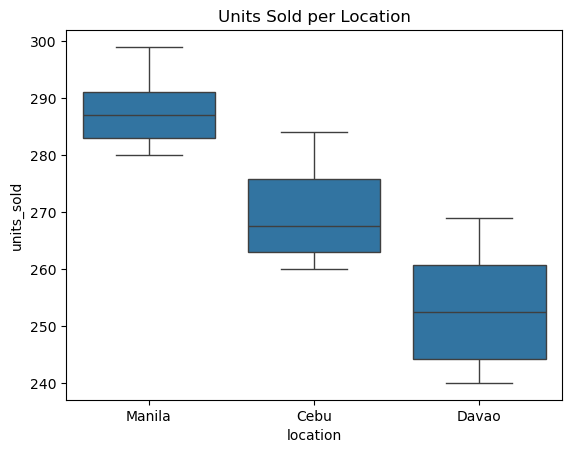

In [16]:
sns.boxplot(x='location', y='units_sold', data=df_clean)
plt.title('Units Sold per Location')
plt.show()


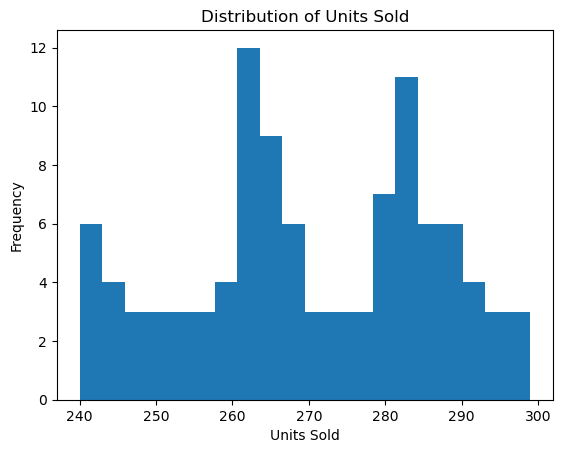

In [17]:
plt.hist(df_clean['units_sold'], bins=20)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()


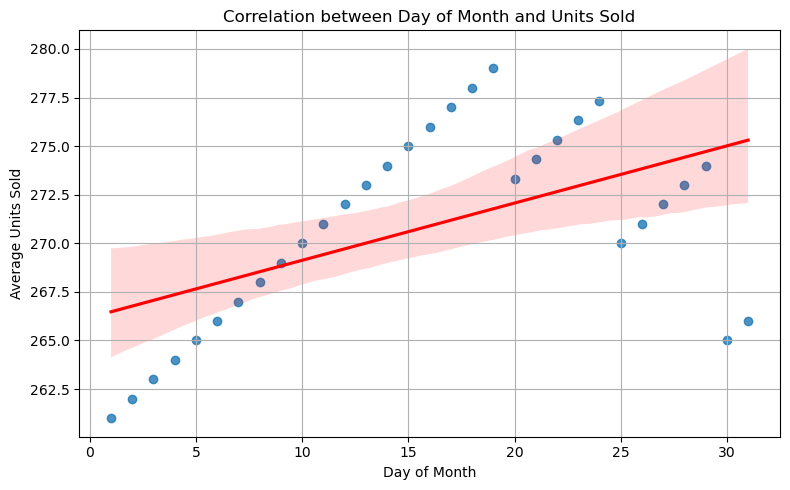

In [18]:
plt.figure(figsize=(8, 5))
sns.regplot(data=daily_avg, x='day_of_month', y='units_sold', line_kws={"color": "red"})
plt.title('Correlation between Day of Month and Units Sold')
plt.xlabel('Day of Month')
plt.ylabel('Average Units Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

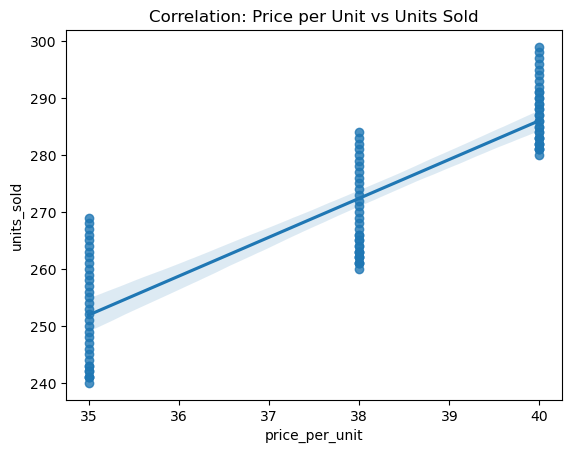

In [19]:
sns.regplot(x='price_per_unit', y='units_sold', data=df_clean)
plt.title('Correlation: Price per Unit vs Units Sold')
plt.show()
